In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv('kyphosis.csv')

In [28]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


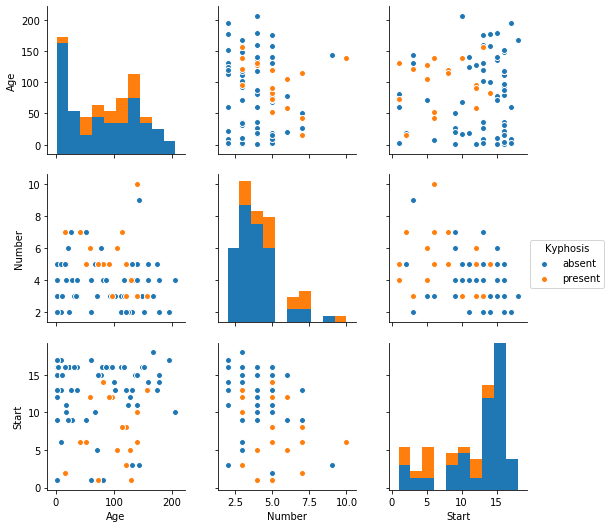

In [30]:
sns.pairplot(df,hue='Kyphosis')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
dtree.score(X_test,y_test)

0.72

In [50]:
predictions = dtree.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.84      0.80      0.82        20
    present       0.33      0.40      0.36         5

avg / total       0.74      0.72      0.73        25



In [58]:
print(confusion_matrix(y_test,predictions))

[[16  4]
 [ 3  2]]


## Bootstrap Aggregation

In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
model = BaggingClassifier(DecisionTreeClassifier(),n_estimators=20,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.72

In [57]:
predictions = model.predict(X_test)

## Random Forests

Now let's compare the decision tree model to a random forest.

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc_pred = rfc.predict(X_test)

In [61]:
print(confusion_matrix(y_test,rfc_pred))

[[16  4]
 [ 3  2]]


In [62]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.84      0.80      0.82        20
    present       0.33      0.40      0.36         5

avg / total       0.74      0.72      0.73        25

